(esercizi-ctt)=
# ✏️ Esercizi

Nel presente esercizio applicheremo alcuni dei concetti della CTT che sono stati esaminati nei capitolo precedenti. Quale esempio, considereremo un piccolo campione di dati relativo alla *Heartland Forgiveness Scale*.

La *Heartland Forgiveness Scale* (HFS) è un questionario di autovalutazione composto da 18 item, progettato per valutare la disposizione al perdono di una persona (ossia la tendenza generale ad essere indulgente), anziché il perdono legato ad un evento o ad una persona specifica. La HFS è costituita da item che riflettono la propensione di una persona a perdonare se stessa (Sottoscala di Perdono di Sé), gli altri individui (Sottoscala di Perdono degli Altri) e situazioni al di là del controllo di chiunque (come ad esempio un disastro naturale; Sottoscala di Perdono delle Situazioni).

Sono calcolati quattro punteggi per la HFS: un punteggio totale HFS e un punteggio per ognuna delle tre sottoscala. Il punteggio totale HFS può variare da 18 a 126, mentre i punteggi per le tre sottoscala HFS possono variare da 6 a 42.

Reverse-Scoring:
Items 2, 4, 6, 7, 9, 11, 13, 15, & 17

La sottoscala del Perdono delle Situazioni comprende sei item, di cui tre sono formulati in maniera inversa, e si valutano su una scala a sette punti:

- HFS13. Quando le cose vanno male per motivi al di là del mio controllo, rimango intrappolato in pensieri negativi a riguardo. (R)
- HFS14. Nel tempo riesco a comprendere le circostanze negative nella mia vita.
- HFS15. Se vengo deluso da situazioni incontrollabili nella mia vita, continuo a pensare negativamente ad esse. (R)
- HFS16. Con il passare del tempo riesco a raggiungere una pace interiore riguardo alle situazioni negative nella mia vita.
- HFS17. Trovo davvero difficile accettare situazioni negative che non dipendono da nessuno. (R)
- HFS18. Col tempo lascio andare i pensieri negativi riguardo alle circostanze negative che sono al di là del controllo di chiunque.
 
Punteggi di risposta:

1 = Quasi sempre falso per me
2 = ?
3 = Più spesso falso per me
4 = ?
5 = Più spesso vero per me
6 = ?
7 = Quasi sempre vero per me

Iniziamo a caricare i pacchetti necessari.

In [2]:
# install.packages("devtools")
# devtools::install_github("cddesja/hemp")

suppressPackageStartupMessages({
    library("tidyverse")
    library("rio")
    library("lavaan")
    library("psych")
    library("kableExtra")
    library("hemp")
    library("boot")
})

Importiamo i dati.

In [3]:
d <- rio::import("../data/hfs_data.csv") |>
    dplyr::select(starts_with("HFS") & -ends_with("r"))

Usiamo `glimpse()` per esaminare il DataFrame.

In [4]:
glimpse(d)

Rows: 102
Columns: 18
$ HFS1  <int> 2, 2, 3, 5, 3, 6, 6, 3, 4, 7, 6, 7, 7, 6, 6, 2, 2, 6, 5, 3, 3, 2~
$ HFS2  <int> 5, 5, 6, 6, 7, 3, 4, 6, 1, 1, 2, 1, 1, 3, 2, 6, 6, 3, 4, 4, 2, 7~
$ HFS3  <int> 4, 4, 5, 6, 4, 3, 5, 5, 4, 7, 4, 7, 6, 6, 7, 4, 4, 6, 5, 6, 6, 3~
$ HFS4  <int> 6, 6, 6, 3, 6, 6, 3, 6, 1, 2, 2, 7, 2, 2, 5, 6, 7, 5, 5, 6, 2, 6~
$ HFS5  <int> 2, 2, 3, 5, 4, 5, 4, 4, 5, 7, 6, 7, 6, 7, 5, 4, 3, 6, 5, 6, 6, 3~
$ HFS6  <int> 5, 5, 6, 5, 7, 6, 7, 7, 1, 2, 1, 1, 1, 2, 5, 7, 7, 4, 5, 4, 2, 7~
$ HFS7  <int> 3, 3, 4, 2, 3, 3, 3, 4, 1, 1, 1, 2, 1, 1, 2, 2, 4, 2, 1, 4, 1, 2~
$ HFS8  <int> 7, 7, 5, 3, 6, 6, 5, 6, 6, 7, 6, 6, 7, 7, 6, 5, 5, 7, 6, 6, 6, 7~
$ HFS9  <int> 3, 3, 6, 4, 3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 1, 4, 2, 3~
$ HFS10 <int> 6, 6, 2, 4, 7, 5, 4, 6, 6, 5, 4, 3, 4, 7, 6, 6, 6, 6, 5, 4, 5, 7~
$ HFS11 <int> 4, 4, 6, 4, 3, 3, 3, 2, 5, 2, 2, 6, 1, 1, 2, 4, 2, 3, 1, 3, 3, 2~
$ HFS12 <int> 7, 7, 3, 4, 4, 6, 3, 6, 6, 7, 6, 2, 7, 6, 7, 7, 6, 6, 6, 3, 5, 7~
$ HFS13 <int> 6, 6

Troviamo il numero di righe e di colonne del DataFrame.

In [5]:
dim(d)

[1] 102  18

Selezioniamo solo gli item della sottoscala del Perdono delle Situazioni.

In [6]:
hfs_situations <- d |>
    dplyr::select(HFS13:HFS18)
    
glimpse(hfs_situations)

Rows: 102
Columns: 6
$ HFS13 <int> 6, 6, 7, 1, 7, 1, 6, 4, 4, 1, 1, 2, 3, 2, 1, 5, 5, 5, 2, 5, 5, 5~
$ HFS14 <int> 7, 7, 5, 5, 3, 6, 6, 5, 6, 7, 7, 7, 6, 7, 7, 5, 5, 6, 6, 6, 6, 5~
$ HFS15 <int> 5, 5, 6, 4, 7, 2, 4, 4, 2, 1, 1, 2, 2, 1, 1, 5, 4, 5, 2, 4, 4, 3~
$ HFS16 <int> 7, 7, 3, 4, 4, 7, 5, 6, 6, 7, 7, 7, 7, 7, 6, 5, 6, 6, 3, 6, 6, 6~
$ HFS17 <int> 5, 5, 4, 1, 6, 5, 5, 6, 2, 1, 1, 1, 2, 2, 1, 3, 6, 2, 2, 4, 5, 3~
$ HFS18 <int> 5, 5, 4, 6, 2, 6, 3, 5, 6, 7, 7, 7, 6, 7, 6, 7, 5, 6, 6, 6, 5, 7~


Ricodifichiamo gli item 13, 15, 17.

In [7]:
reversed_columns <- c("HFS13", "HFS15", "HFS17")

hfs_situations <- hfs_situations %>%
    mutate(across(all_of(reversed_columns), ~ 8 - .))

glimpse(hfs_situations)

Rows: 102
Columns: 6
$ HFS13 <dbl> 2, 2, 1, 7, 1, 7, 2, 4, 4, 7, 7, 6, 5, 6, 7, 3, 3, 3, 6, 3, 3, 3~
$ HFS14 <int> 7, 7, 5, 5, 3, 6, 6, 5, 6, 7, 7, 7, 6, 7, 7, 5, 5, 6, 6, 6, 6, 5~
$ HFS15 <dbl> 3, 3, 2, 4, 1, 6, 4, 4, 6, 7, 7, 6, 6, 7, 7, 3, 4, 3, 6, 4, 4, 5~
$ HFS16 <int> 7, 7, 3, 4, 4, 7, 5, 6, 6, 7, 7, 7, 7, 7, 6, 5, 6, 6, 3, 6, 6, 6~
$ HFS17 <dbl> 3, 3, 4, 7, 2, 3, 3, 2, 6, 7, 7, 7, 6, 6, 7, 5, 2, 6, 6, 4, 3, 5~
$ HFS18 <int> 5, 5, 4, 6, 2, 6, 3, 5, 6, 7, 7, 7, 6, 7, 6, 7, 5, 6, 6, 6, 5, 7~


Esaminiamo la matrice di varianze-covarianze.

In [8]:
round(cov(hfs_situations), 2)

,HFS13,HFS14,HFS15,HFS16,HFS17,HFS18
HFS13,3.23,1.31,1.71,1.08,1.58,1.39
HFS14,1.31,2.16,1.24,1.44,1.16,1.28
HFS15,1.71,1.24,2.60,1.05,1.85,1.10
HFS16,1.08,1.44,1.05,2.24,1.08,1.40
HFS17,1.58,1.16,1.85,1.08,3.39,1.43
HFS18,1.39,1.28,1.10,1.40,1.43,2.17


Esaminiamo la matrice di correlazioni.

In [9]:
round(cor(hfs_situations), 2)

,HFS13,HFS14,HFS15,HFS16,HFS17,HFS18
HFS13,1.00,0.50,0.59,0.40,0.48,0.53
HFS14,0.50,1.00,0.52,0.66,0.43,0.59
HFS15,0.59,0.52,1.00,0.44,0.62,0.46
HFS16,0.40,0.66,0.44,1.00,0.39,0.64
HFS17,0.48,0.43,0.62,0.39,1.00,0.53
HFS18,0.53,0.59,0.46,0.64,0.53,1.00


Creiamo un istogramma per la distribuzione di ciascun item. Questo è utile per valutare visivamente eventuali scostamenti dalla normalità.

In [10]:
hfs_sit_long <- hfs_situations %>%
    pivot_longer(cols = starts_with("HFS"), names_to = "item", values_to = "score")

head(hfs_sit_long)

item,score
<chr>,<dbl>
HFS13,2
HFS14,7
HFS15,3
HFS16,7
HFS17,3
HFS18,5


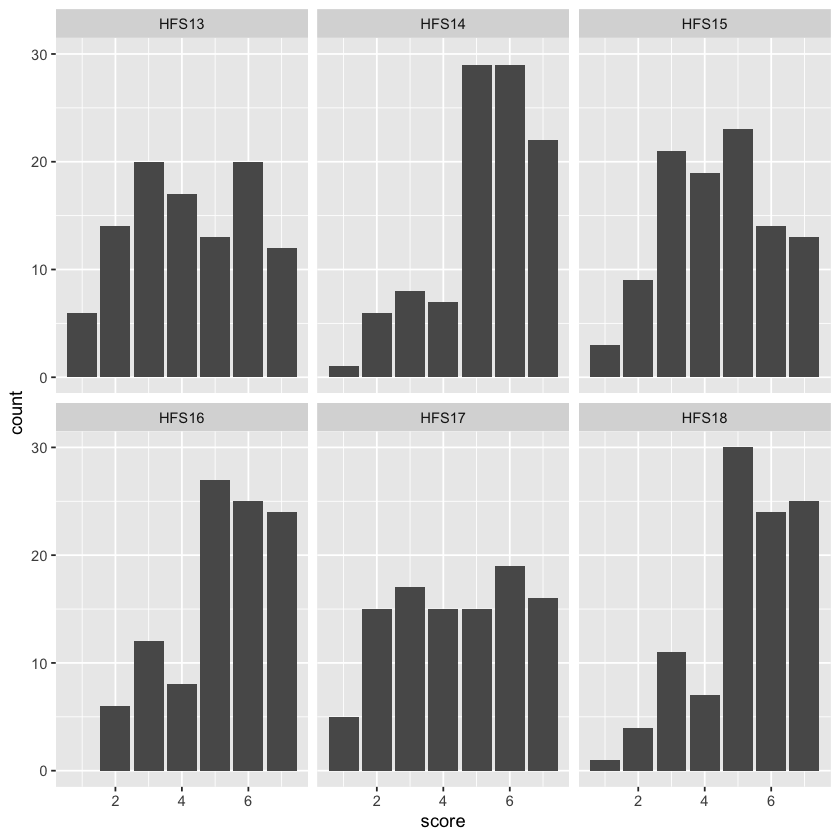

In [11]:
hfs_sit_long |>
    ggplot(aes(score)) +
    geom_bar() +
    facet_wrap(~item)

Una rappresentazione grafica migliore, se vogliamo esaminare gli scostamenti dalla normalità, si ottiene con un qq-plot per ciascun item.

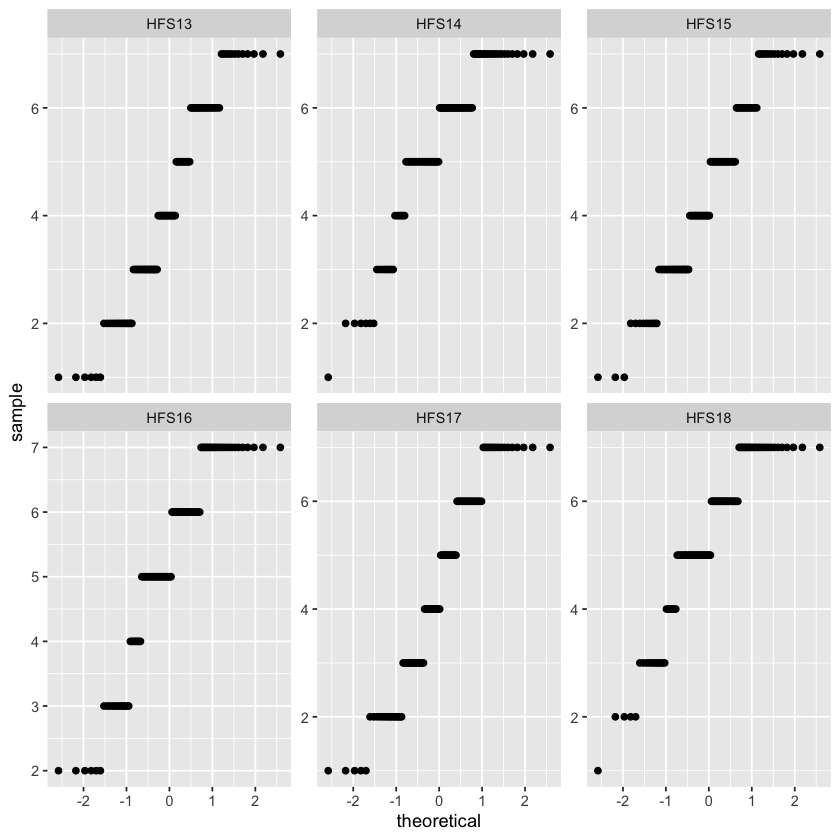

In [12]:
ggplot(hfs_sit_long, aes(sample = score)) +
    stat_qq() +
    facet_wrap(~item, scales = "free_y")

È possibile calcolare gli indici di curtosi e di asimmetria, insieme alle statistiche descrittive, per ciascun item utilizzando la funzione `describe()`.

In [14]:
psych::describe(hfs_situations) |> round(2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFS13,1,102,4.23,1.80,4.0,4.23,2.97,1,7,6,-0.03,-1.16,0.18
HFS14,2,102,5.27,1.47,5.5,5.44,0.74,1,7,6,-0.84,0.06,0.15
HFS15,3,102,4.41,1.61,4.0,4.43,1.48,1,7,6,-0.05,-0.87,0.16
HFS16,4,102,5.23,1.50,5.0,5.35,1.48,2,7,5,-0.60,-0.63,0.15
HFS17,5,102,4.38,1.84,4.0,4.41,2.97,1,7,6,-0.11,-1.22,0.18
HFS18,6,102,5.28,1.47,5.0,5.43,1.48,1,7,6,-0.71,-0.19,0.15


Valutiamo se ci sono dei dati mancanti.

In [15]:
missing_counts <- hfs_situations %>%
    summarise_all(~ sum(is.na(.)))

print(missing_counts)

  HFS13 HFS14 HFS15 HFS16 HFS17 HFS18
1     0     0     0     0     0     0


Se avessime due misurazioni ripetute, dopo un intervallo temporale, dei punteggi della scala, potremmo calcolare l'affidabilità test-retest mediante la correlazione di Pearson. Per esempio, con la funzione `cor.test(x_t1, x_t2)`. Tuttavia, per questi dati questo non è possibile.

È invece possibile stimare l'attendibilità come coerenza interna. 

Una semplice misura di coerenza interna è rappresentata dall'affidabilità *split-half*. Per stimare l'affidabilità *split-half*, è possibile suddividere un test in due parti equivalenti, calcolare i punteggi totali per entrambe le parti e calcolarne la correlazione. Esistono diversi metodi per effettuare questa suddivisione (ad esempio, selezionando item pari e dispari oppure utilizzando un metodo casuale, etc.). Di seguito, calcoleremo l'affidabilità *split-half* utilizzando la suddivisione tra item pari e dispari.

In [16]:
split_half(hfs_situations, type = "alternate")

[1] 0.639

In questo secondo caso, l'affidabilità *split-half* è calcolata selezionando due sottoinsiemi casuali di item della stessa numerosità.

In [17]:
set.seed(1234)
split_half(hfs_situations, type = "random")

[1] 0.776

La stima dell'affidabilità split-half è distorta verso il basso (R. J. Cohen, Swerdlik e Sturman, 2013). La correzione Spearman-Brown può essere applicata per superare questo problema. Per fare ciò, basta passare l'argomento `sb = TRUE` alla funzione `split_half()`.

In [18]:
split_half(hfs_situations, type = "alternate", sb = TRUE)

[1] 0.7797437

Data la nostra attuale stima di affidabilità, possiamo anche determinare la lunghezza di un test per ottenere l'affidabilità desiderata. Possiamo farlo usando la funzione `test_length()` in `hemp`. Supponendo di volere un'affidabilità di 0.95, possiamo determinare di quanti item dovrebbe essere costituito il test. Nella chiamata a `test_length()`, specifichiamo `r_type = "split"` in modo che l'affidabilità attuale venga calcolata utilizzando l'affidabilità split-half con la correzione di Spearman-Brown. 

In [19]:
test_length(hfs_situations, r = .9, r_type = "split")

[1] 16

Se vogliamo un test con un'affidabilità di 0.9, data l'affidabilità attuale del test basata su 6 item, avremmo bisogno di un test che consiste di almeno 16 item.

La misura più comune della consistenza interna è il coefficiente alfa (Cronbach, 1951). Il coefficiente alfa rappresenta la media di tutte le possibili correlazioni split-half. Può essere calcolato utilizzando la funzione `alpha()` in `psych`.

In [20]:
psych::alpha(hfs_situations)


Reliability analysis   
Call: psych::alpha(x = hfs_situations)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.86      0.87    0.86      0.52 6.5 0.021  4.8 1.2     0.52

    95% confidence boundaries 
         lower alpha upper
Feldt     0.82  0.86   0.9
Duhachek  0.82  0.86   0.9

 Reliability if an item is dropped:
      raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
HFS13      0.84      0.85    0.84      0.53 5.6    0.025 0.0091  0.53
HFS14      0.83      0.84    0.83      0.51 5.2    0.026 0.0078  0.50
HFS15      0.83      0.84    0.82      0.51 5.3    0.026 0.0086  0.51
HFS16      0.84      0.85    0.83      0.53 5.5    0.024 0.0038  0.53
HFS17      0.85      0.85    0.84      0.53 5.7    0.024 0.0072  0.53
HFS18      0.83      0.83    0.82      0.50 5.1    0.026 0.0088  0.49

 Item statistics 
        n raw.r std.r r.cor r.drop mean  sd
HFS13 102  0.77  0.75  0.68   0.63  4.2 1.8
HFS14 102  0.78  0.80  0.75   0.68  5.3 1.5
HFS15 102

Anche se le stime puntuali di affidabilità possono essere utili, è generalmente utile calcolare un intervallo di confidenza. Quando la dimensione del campione è piccola, le ipotesi dei modelli statistici non sono soddisfatte o la distribuzione campionaria di un parametro è sconosciuta, allora il bootstrap può essere utilizzato per costruire una distribuzione campionaria empirica, che possiamo quindi utilizzare per creare intervalli di confidenza (Efron & Tibshirani, 1986 ).

La nostra motivazione per l'introduzione del bootstrapping è che consente la creazione di intervalli di confidenza e incertezza indipendentemente dal parametro stimato. Pertanto, mentre illustriamo l'uso del bootstrap per il coefficiente alfa, questo può essere facilmente applicato per l'affidabilità split-half di cui sopra, la validità o le statistiche dell'analisi degli item presentati più avanti e in molti altri contesti.
Per eseguire il bootstrap per il coefficiente alfa, possiamo usare, ad esempio, il pacchetto `boot` (Canty & Ripley, 2017).

Dobbiamo creare una funzione da passare alla funzione `boot`, che chiamiamo `alpha_fun()`. Questa funzione accetta due argomenti: un set di dati, chiamato `data`, e una matrice di indici, chiamata `row` Questi argomenti vengono quindi passati alla funzione `coef_alpha`. Ciò consentirà alla funzione `boot` di eseguire un campionamento con rimpiazzo delle righe di `data` e creare una distribuzione empirica per il coefficiente alfa.

In [21]:
alpha_fun <- function(data, row) {
    hemp::coef_alpha(data[row, ])
}

In [22]:
alpha_boot <- boot(SAPA, alpha_fun, R = 1e3)
alpha_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = SAPA, statistic = alpha_fun, R = 1000)


Bootstrap Statistics :
    original    bias    std. error
t1*    0.841 -0.000318 0.005397037

La figura seguente mostra un istogramma e un Q-Q plot della distribuzione empirica per il coefficiente alfa basato sui 1000 campioni.

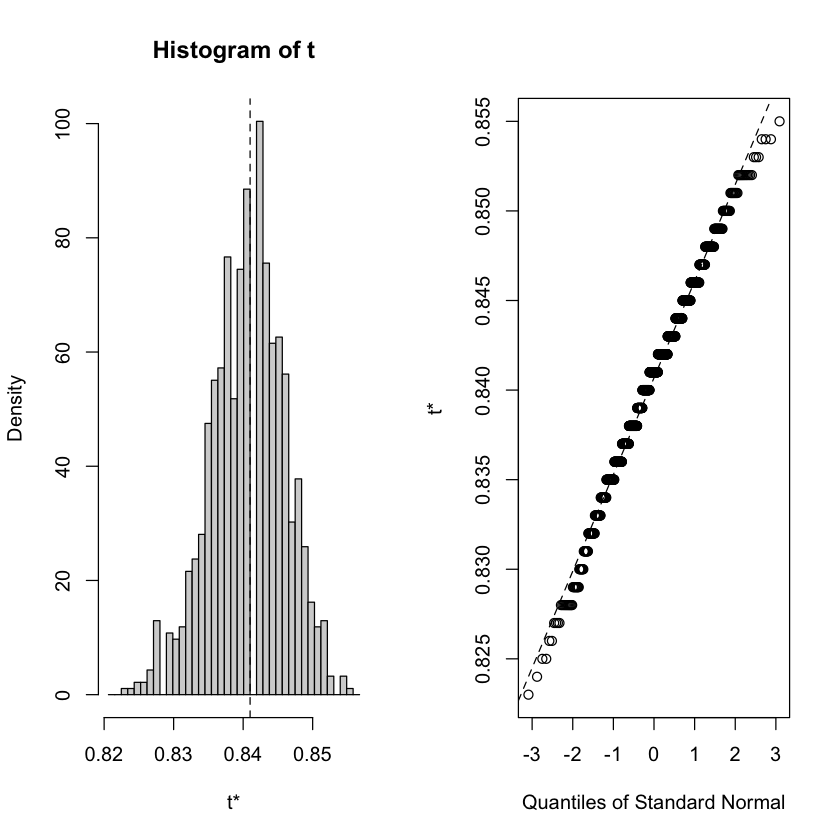

In [23]:
plot(alpha_boot)

Utilizziamo la funzione `boot.ci()` per calcolare gli intervalli di confidenza al 95% utilizzando gli intervalli `norm`, `basic` e `perc`. In breve, gli intervalli `basic` e `perc` fanno meno assunzioni rispetto agli intervalli `norm` (ovvero, nessuna assunzione di normalità asintotica). Se la distribuzione empirica si discosta dalla normalità, allora gli intervalli `basic` e `perc` sono una scelta migliore.

In [24]:
boot.ci(alpha_boot, type = c("norm", "basic", "perc"))

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = alpha_boot, type = c("norm", "basic", "perc"))

Intervals : 
Level      Normal              Basic              Percentile     
95%   ( 0.8307,  0.8519 )   ( 0.8310,  0.8530 )   ( 0.8290,  0.8510 )  
Calculations and Intervals on Original Scale